## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import f1_score, roc_auc_score


In [ ]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

## Exploratory data analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#df = pd.read_csv('creditcard.csv')
df = pd.read_csv('/content/drive/My Drive/Upgrad/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#observe the different feature type present in the data

df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Here we will observe the distribution of our classes

In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

<BarContainer object of 4 artists>

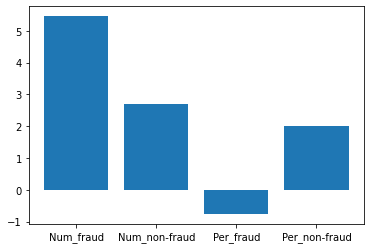

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
X=['Num_fraud','Num_non-fraud','Per_fraud','Per_non-fraud']
Y =[np.log10(classes[0]),np.log10(classes[1]),np.log10(fraud_share),np.log10(normal_share)]
plt.bar(X,Y)


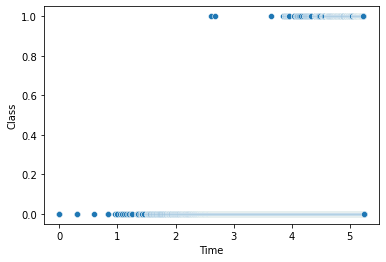

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
#plt.scatter(df.Time, df.Class)
sns.scatterplot(x=np.log10(df.Time) , y = df.Class)



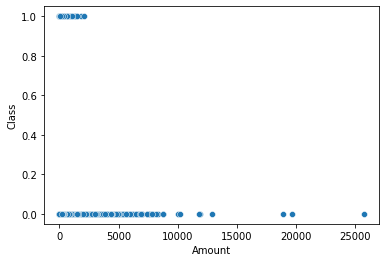

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x=df.Amount , y = df.Class)

Frauds are for amount below 5000 as seen from the plot above

(array([2.84395e+05, 3.60000e+02, 3.60000e+01, 1.00000e+01, 2.00000e+00,
        1.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0.   ,  2569.116,  5138.232,  7707.348, 10276.464, 12845.58 ,
        15414.696, 17983.812, 20552.928, 23122.044, 25691.16 ]),
 <a list of 10 Patch objects>)

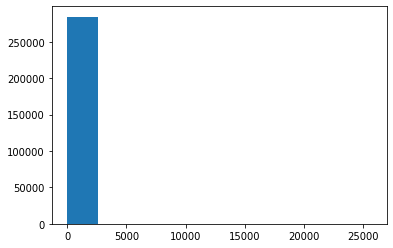

In [ ]:
# Univariate Analysis for Amount
plt.hist(df['Amount'])

It can be obsereved from the above plot that Amount ranges from 0 to 25691.16. 


In [ ]:
#checking skewness in the dataframe for Amount:
df['Amount'].skew()

16.977724453761024

As observed the feature `Amount` is highly positively skewed. Thus, we shall apply Power Transfomer package to reduce the skewness.

In [ ]:
# Drop unnecessary columns
# we can drop TIME since it does not seem to have any significance in the analysis given the data is spread across as seen in scatter plot
df_new = df.drop(columns='Time')

In [ ]:
df_new.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [ ]:
df_new.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

As seen above , there are no 'NULL' values in any of the columns

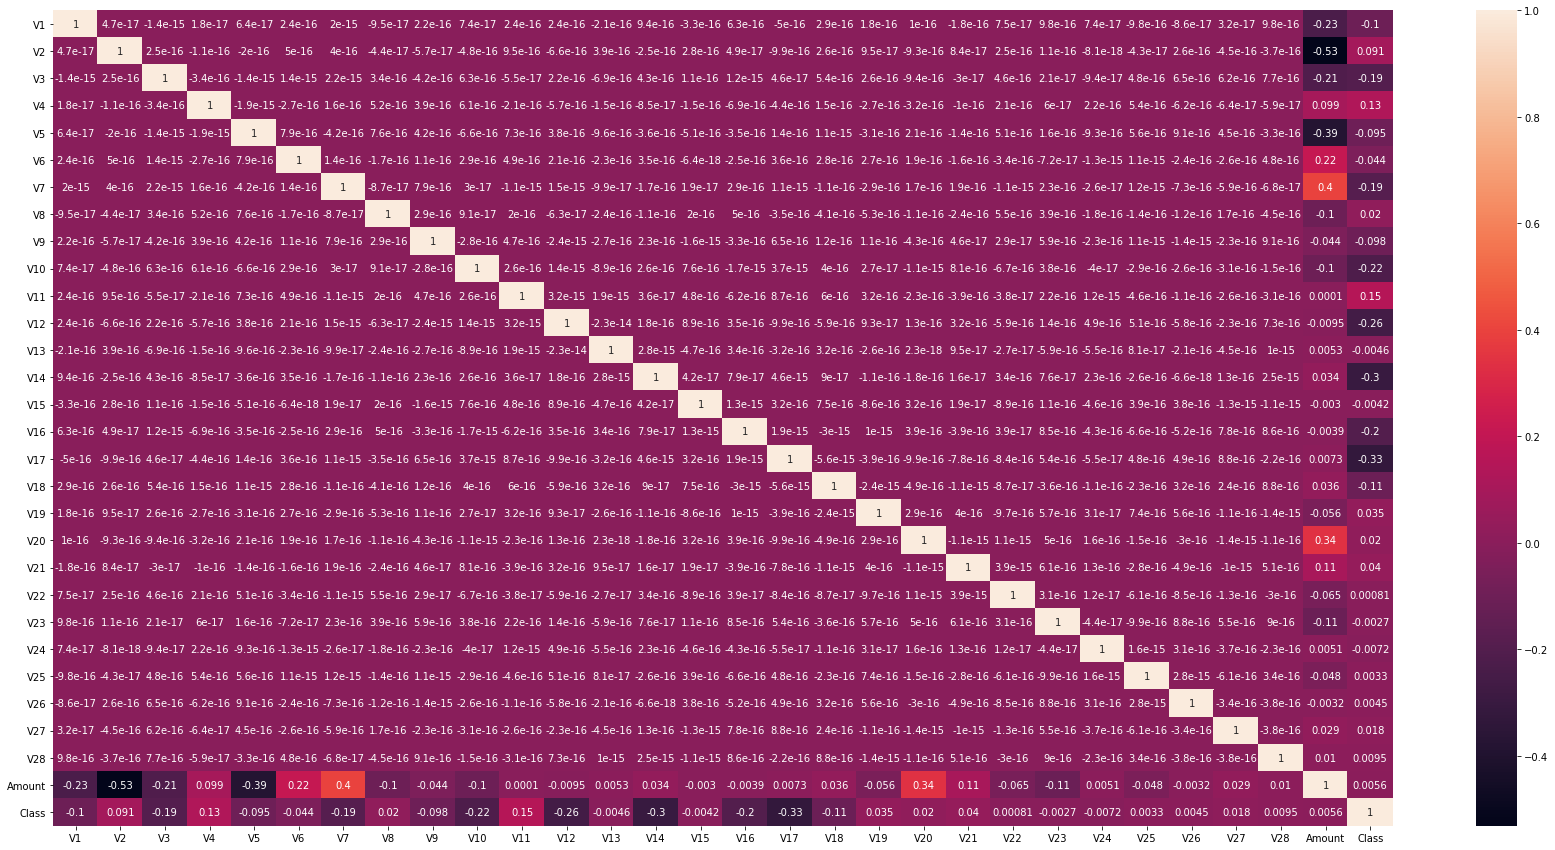

In [ ]:
# Now we will plot a heatmap to verify the correlation of the variables.
plt.figure(figsize=[30,15])
sns.heatmap(df_new.corr(),annot=True)
plt.show()

V7 and V20 seems to be correlated to Amount but we will keep them since the coff of correlation is still not big enough

### Splitting the data into train & test data

In [ ]:
X = df_new.drop(['Class'], axis = 1)     
y= df_new['Class']#class variable

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [ ]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
350
142


### Plotting the distribution of a variable

We already know that the variable which is highly skewed in the dataset is the feature `Amount` with Skewness value of 16.9 and we have done univariate analysis for the feature as well.

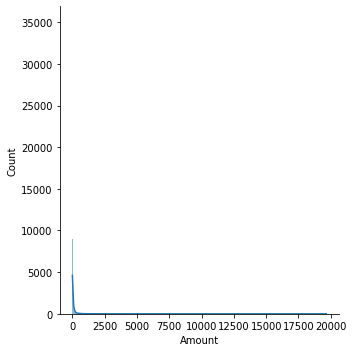

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness.

ax= sns.displot(data=X_train, x="Amount",kde=True)
plt.show()

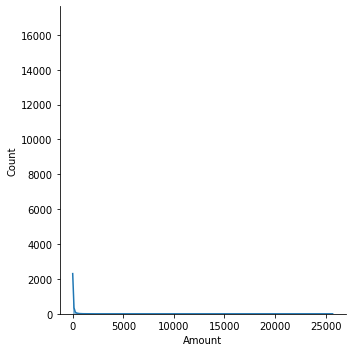

In [ ]:
ax= sns.displot(data=X_test, x="Amount",kde=True)
plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [ ]:
X_train['Amount']

7610        0.26
190214      1.29
130590     71.99
247916      0.89
55518       5.99
           ...  
212912     49.90
65615      34.34
253799    639.40
210755      1.99
56088     235.00
Name: Amount, Length: 199364, dtype: float64

In [ ]:
X_test['Amount']

49089       1.99
154704      6.99
67247     306.16
251657      0.99
201903     30.27
           ...  
227071      2.49
161101     99.71
45955     372.62
32565       0.80
283008     70.00
Name: Amount, Length: 85443, dtype: float64

In [ ]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
pt.fit(X_train[['Amount']]) #Fit the PT on training data
X_train[['Amount']] = pt.transform(X_train[['Amount']])    #Then apply on all data
X_test[['Amount']] = pt.transform(X_test[['Amount']])


In [ ]:
X_train['Amount']

7610     -1.849091
190214   -1.444507
130590    0.705619
247916   -1.573363
55518    -0.716379
            ...   
212912    0.496220
65615     0.280949
253799    1.900060
210755   -1.267257
56088     1.365105
Name: Amount, Length: 199364, dtype: float64

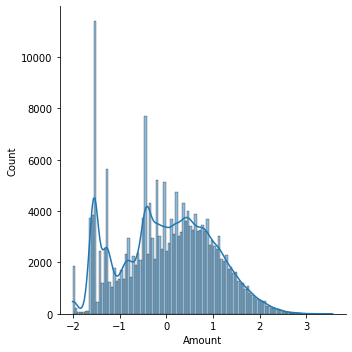

In [ ]:
# plot the histogram of a variable from the dataset again to see the result 

ax= sns.displot(data=X_train, x="Amount",kde=True)
plt.show()

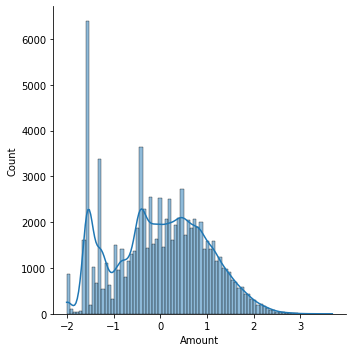

In [ ]:
ax= sns.displot(data=X_test, x="Amount",kde=True)
plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

In [ ]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression #import the package

model_logreg = LogisticRegression()

In [ ]:
#lets run the default logistic regression 
LR_def = model_logreg.fit(X_train,y_train)
y_pred_def = LR_def.predict(X_test)
y_pred_def_proba=LR_def.predict_proba(X_test)[:,1]

In [ ]:
print("F1 score for Logistic Regression in unbalanced dataset is: {}".format(f1_score(y_test, y_pred_def)))
print("AUC Score for Logistic Regression in unbalanced dataset is: {}".format(roc_auc_score(y_test, y_pred_def_proba)))

F1 score for Logistic Regression in unbalanced dataset is: 0.7131782945736435
AUC Score for Logistic Regression in unbalanced dataset is: 0.9721848281751564


In [ ]:
# Note Recall is lowest , so lets find the hyperparameters to improve recall

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
num_C = [100, 10, 1.0,0.1,0.01,0.001]  #--> penalty strength
cv_num = ['l1','l2'] #--> regularization (penalty)
solvers = ['liblinear'] #solver tries to find the parameter weights that minimize a cost function

In [ ]:
#perform cross validation

grid = dict(solver=solvers,penalty= cv_num,C= num_C)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
clf = LogisticRegression()
#perform hyperparameter tuning

grid_search = GridSearchCV(estimator=clf, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
clf_1 = grid_search.fit(X_train, y_train)

#print the optimum value of hyperparameters

print("Best: %f using %s" % (clf_1.best_score_, clf_1.best_params_))

Best: 0.985188 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


As can be seen the best score selected after applying GridSearch in Logistic Regression is 0.985188 using penalty strength 0.01, penalty l2 and solver liblinear.



In [ ]:
y_pred= clf_1.predict(X_test)
y_pred_proba=clf_1.predict_proba(X_test)[:,1]

In [ ]:
print("F1 score for Logistic Regression in unbalanced dataset is: {}".format(f1_score(y_test, y_pred)))
print("AUC Score for Logistic Regression in unbalanced dataset is: {}".format(roc_auc_score(y_test, y_pred_proba)))

F1 score for Logistic Regression in unbalanced dataset is: 0.6910569105691057
AUC Score for Logistic Regression in unbalanced dataset is: 0.9707487371562937


As we can see there is hardly any improvement in matrics with hyperparameter tuning , so Logistic Regression does not seem to the right choice 

**Applying XGBoost:**

In [ ]:
# Lets try XGBoost 
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, gamma = 0.2, n_estimators = 150,min_child_weight=3,booster='gbtree',scoring='roc_auc')

In [ ]:
xg_reg_1= xg_reg.fit(X_train,y_train)

In [ ]:
preds = xg_reg_1.predict(X_test)
preds_proba=xg_reg_1.predict_proba(X_test)[:,1]

In [ ]:
print("F1 score for Logistic Regression in unbalanced dataset is: {}".format(f1_score(y_test, preds)))
print("AUC Score for Logistic Regression in unbalanced dataset is: {}".format(roc_auc_score(y_test, preds_proba)))

F1 score for Logistic Regression in unbalanced dataset is: 0.8171206225680935
AUC Score for Logistic Regression in unbalanced dataset is: 0.9808124370188022


In [ ]:

xgb_params = xg_reg.get_xgb_params()

cv_results = xgb.cv(dtrain=data_dmatrix, params=xgb_params, nfold=5,
                    num_boost_round=xg_reg.get_params()['n_estimators'],early_stopping_rounds=50,metrics="auc", as_pandas=True, seed=123)

In [ ]:
# Use the tuned hyperparameters
xg_reg.set_params(n_estimators=cv_results.shape[0])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, scoring='roc_auc',
              seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
#use this to train and predict
xg_reg_2 = xg_reg.fit(X_train,y_train,eval_metric='auc')

In [ ]:
pred_xg_2 = xg_reg_2.predict(X_test)
y_pred_proba_2 = xg_reg_2.predict_proba(X_test)[:, 1]

In [ ]:
print("F1 score for XGBoost in unbalanced dataset is: {}".format(f1_score(y_test, pred_xg_2)))
print("AUC Score for XGBoost in unbalanced dataset is: {}".format(roc_auc_score(y_test, y_pred_proba_2)))

F1 score for XGBoost in unbalanced dataset is: 0.8171206225680935
AUC Score for XGBoost in unbalanced dataset is: 0.9808124370188022


**Applying Random Forest**

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier 

In [ ]:
# Create the parameter grid based on the results of random search  
# Importing random forest classifier from sklearn library

param_grid = {
    'max_depth': [4,8,12],
   # 'min_samples_leaf': range(1000, 4000, 2000)
   # 'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200,300]
    #'max_features': [5, 10,15,25]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,scoring='roc_auc',verbose = 1)
# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 64.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search_rf.best_score_,'using',grid_search_rf.best_params_)

We can get accuracy of 0.978325119190651 using {'max_depth': 12, 'n_estimators': 200}


In [ ]:
# model with the best hyperparameters

clf_3 = RandomForestClassifier(bootstrap=True,
                             max_depth=12,
                             n_estimators=200)
clf_3.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# predict
y_pred_rfc = clf_3.predict(X_test)
y_pred_proba_rfc = clf_3.predict_proba(X_test)[:, 1]

print("F1 score is: {}".format(f1_score(y_test, y_pred_rfc)))
print("AUC Score is: {}".format(roc_auc_score(y_test, y_pred_proba_rfc)))

F1 score is: 0.8199233716475096
AUC Score is: 0.9745722727356035


We will go ahead with Random Forest for unbalanced dataset. As it has better F1 score and AUC score than other models

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 12
3rd Top var = 14


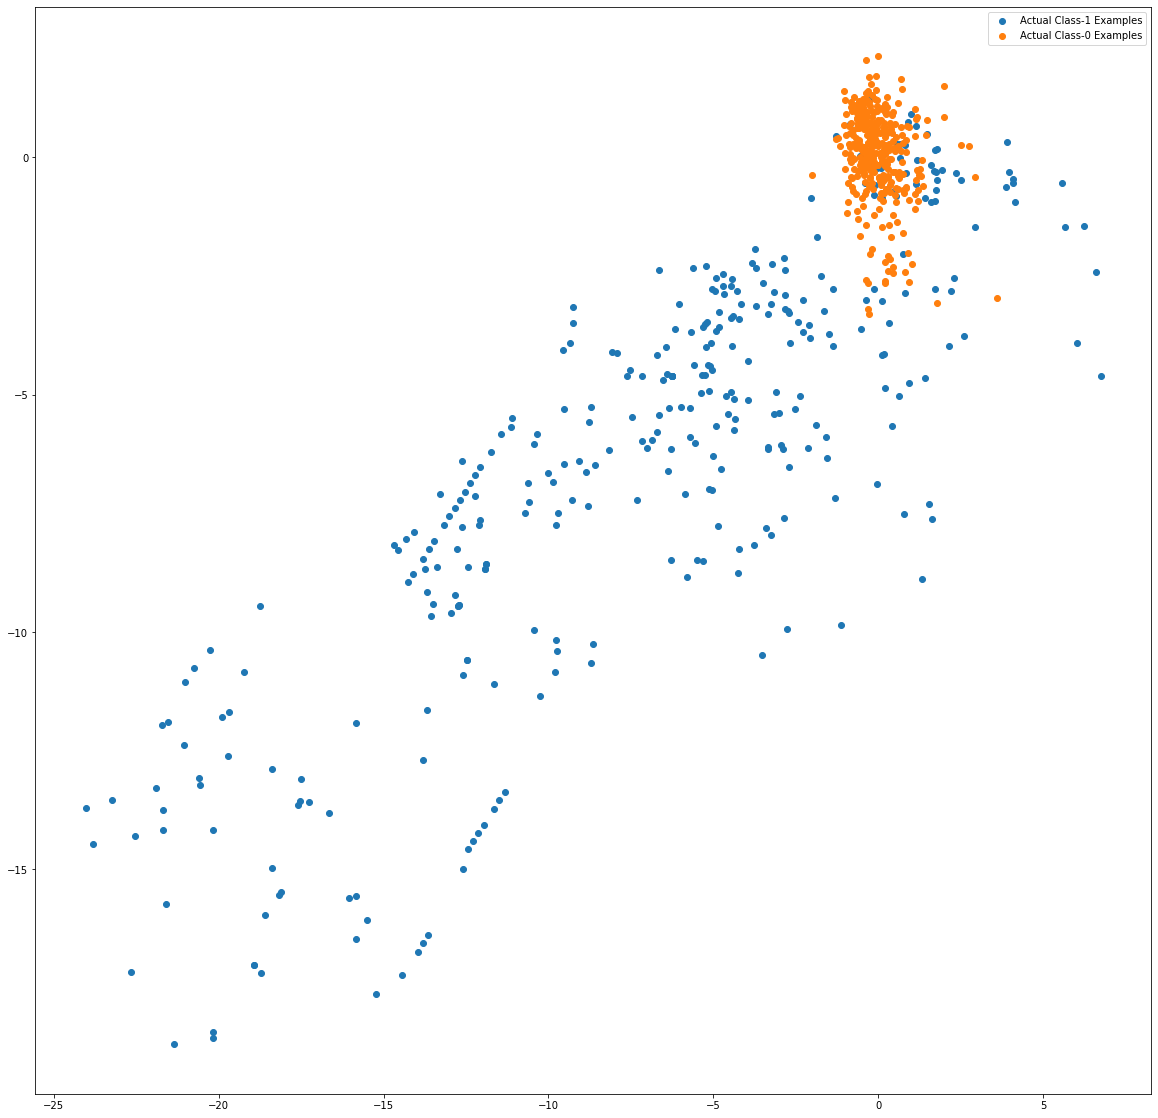

In [ ]:
var_imp = []
for i in clf_3.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf_3.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf_3.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf_3.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf_3.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf_3.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = [100, 10, 1.0,0.1,0.01]  #--> penalty strength
cv_num = ['l1','l2'] #--> regularization (penalty)
solvers = ['liblinear'] #solver tries to find the parameter weights that minimize a cost function

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [ ]:
#- import the packages
from imblearn.over_sampling import RandomOverSampler
#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_sample(X_train, y_train)
y_over.mean()



0.5

In [ ]:
X_over.shape

(398028, 29)

Applying Logistic Regression:

In [ ]:
# Using the best params building model for logistic regression using the balanced data:

#grid = {'solver':['liblinear'],'penalty': ['l1'],'C': [1000]}
clf_logreg= LogisticRegression()
grid = dict(solver=solvers,penalty= cv_num,C= num_C)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search_over = GridSearchCV(estimator=clf_logreg, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_search_over.fit(X_over, y_over)
y_pred_reg_over = grid_search_over.predict(X_test)
y_pred_proba_reg_over = grid_search_over.predict_proba(X_test)[:,1]
print("Best: %f using %s" % (grid_search_over.best_score_, grid_search_over.best_params_))
print("F1 score is: {}".format(f1_score(y_test, y_pred_reg_over)))
print("AUC Score is: {}".format(roc_auc_score(y_test, y_pred_proba_reg_over)))

Best: 0.989147 using {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
F1 score is: 0.11694290976058933
AUC Score is: 0.9727008962958181


Oversampling degrades the matrics for Logistic regression , F1 score goes low and regularisation parameter goes higher too !

Applying XGBoost:

In [ ]:
xg_over = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, gamma = 0.2, n_estimators = 150,min_child_weight=3,booster='gbtree', scoring='roc_auc')
#xg_over_1= xg_over.fit(X_over,y_over,eval_metric='auc')
#y_pred_xg_1 = xg_over_1.predict(X_test)

#print("F1 score for XGBoost in balanced dataset is: {}".format(f1_score(y_test, y_pred_xg_1)))
#print("AUC Score for XGBoost in balanced dataset is: {}".format(roc_auc_score(y_test, y_pred_xg_1)))


In [ ]:
xgb_params = xg_over.get_xgb_params()
data_dmatrix_over = xgb.DMatrix(data=X_over, label=y_over)
cv_results_xgb = xgb.cv(dtrain=data_dmatrix_over, params=xgb_params, nfold=3,
                    num_boost_round=xg_over.get_params()['n_estimators'],early_stopping_rounds=50,metrics="auc", as_pandas=True, seed=123)
# Getting the tuned hyperparameters
xg_over.set_params(n_estimators=cv_results_xgb.shape[0])


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, scoring='roc_auc',
              seed=None, silent=None, subsample=1, verbosity=1)

In [39]:
#use this to train and predict
xg_over_2 = xg_over.fit(X_over,y_over,eval_metric='auc')
y_pred_xg_2 = xg_over_2.predict(X_test.values)
y_pred_xg_proba_2 = xg_over_2.predict_proba(X_test.values)[:,1]
print("F1 score is: {}".format(f1_score(y_test, y_pred_xg_2)))
print("AUC Score is: {}".format(roc_auc_score(y_test, y_pred_xg_proba_2)))

F1 score is: 0.7687296416938112
AUC Score is: 0.974676666934704


Applying Random Forest:

In [ ]:
param_grid = {
    'max_depth': [4,8,12],
   # 'min_samples_leaf': range(1000, 4000, 2000)
   # 'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200,300]
    #'max_features': [5, 10,15,25]
}
# Create a based model
rf_over = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf_over = GridSearchCV(estimator = rf_over, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,scoring='roc_auc',verbose = 1)
# Fit the grid search to the data
rf_over_1 = grid_search_rf_over.fit(X_over, y_over)
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search_rf_over.best_score_,'using',grid_search_rf_over.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 39.9min finished


We can get accuracy of 0.9999918211301296 using {'max_depth': 12, 'n_estimators': 300}


In [ ]:
y_pred_rf_over = rf_over_1.predict(X_test)
y_pred_proba_rf_over = rf_over_1.predict_proba(X_test)[:,1]
print("F1 score is: {}".format(f1_score(y_test, y_pred_rf_over)))
print("AUC Score is: {}".format(roc_auc_score(y_test, y_pred_proba_rf_over)))

F1 score is: 0.7702702702702703
AUC Score is: 0.9836298833080074


Oversampling here is done for three models Logistic Regression, XGBoost, and Random Forest.

### Print the class distribution after applying SMOTE 

In [ ]:
from imblearn.over_sampling import SMOTE

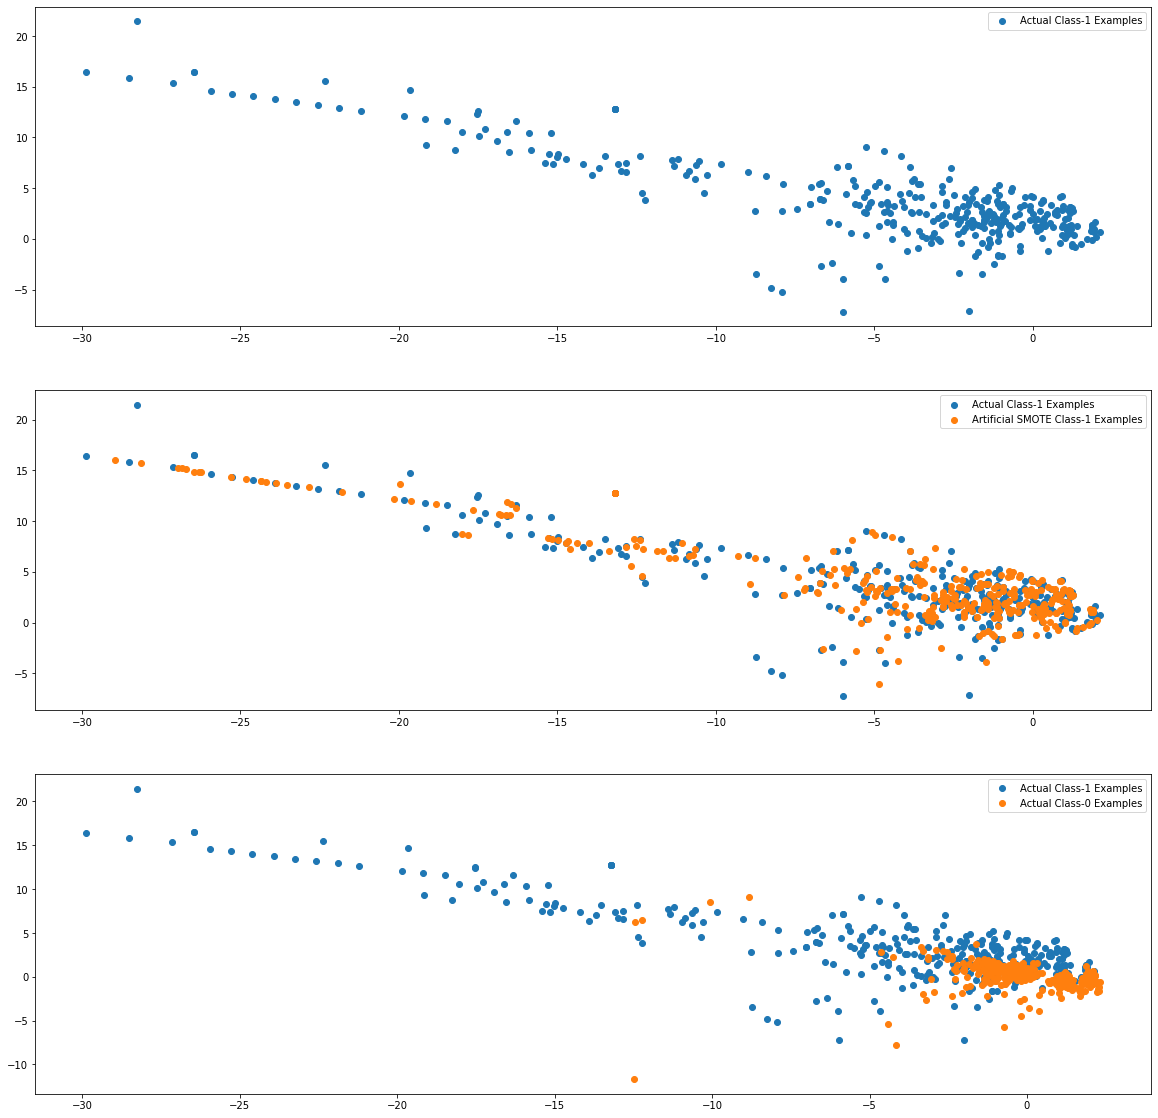

In [ ]:
import warnings
warnings.filterwarnings("ignore")


sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

Applying Logistic regression:

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE
grid = dict(solver=solvers,penalty= cv_num,C= num_C)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
clf = LogisticRegression()
#perform hyperparameter tuning
grid_search = GridSearchCV(estimator=clf, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
clf_smote = grid_search.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
y_pred_smote = clf_smote.predict(X_test)
y_pred_proba_reg_smote = clf_smote.predict_proba(X_test)[:,1]
print("F1 score is: {}".format(f1_score(y_test, y_pred_smote)))
print("AUC Score is: {}".format(roc_auc_score(y_test, y_pred_proba_reg_smote)))
#print the optimum value of hyperparameters
print("Best: %f using %s" % (clf_smote.best_score_, clf_smote.best_params_))


F1 score is: 0.11441441441441443
AUC Score is: 0.9719341417492423
Best: 0.990282 using {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


Logistic regression does poorly on F1-Score here

Applying XGBoost:

In [ ]:
xg_smote = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, gamma = 0.2, n_estimators = 150,min_child_weight=3,booster='gbtree', scoring='roc_auc')

In [ ]:
xgb_params = xg_smote.get_xgb_params()
data_dmatrix_smote = xgb.DMatrix(data=X_train_smote, label=y_train_smote)
cv_results_xgb = xgb.cv(dtrain=data_dmatrix_smote, params=xgb_params, nfold=5,
                    num_boost_round=xg_smote.get_params()['n_estimators'],early_stopping_rounds=50,metrics="auc", as_pandas=True, seed=123)
# Getting the tuned hyperparameters
xg_smote.set_params(n_estimators=cv_results_xgb.shape[0])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, scoring='roc_auc',
              seed=None, silent=None, subsample=1, verbosity=1)

In [40]:
#use this to train and predict
xg_smote_2 = xg_smote.fit(X_train_smote,y_train_smote,eval_metric='auc')
y_pred_xg_smote_2 = xg_smote_2.predict(X_test.values)
y_pred_xg_smote_proba_2 = xg_smote_2.predict_proba(X_test.values)[:,1]
print("F1 score is: {}".format(f1_score(y_test, y_pred_xg_smote_2)))
print("AUC Score is: {}".format(roc_auc_score(y_test, y_pred_xg_smote_proba_2)))

F1 score is: 0.5152838427947598
AUC Score is: 0.968320137587344


Applying Random Forest:

In [49]:
param_grid = {
    'max_depth': [4],
   # 'min_samples_leaf': range(1000, 4000, 2000)
   # 'min_samples_split': range(200, 500, 200),
    'n_estimators': [200,300,400,500,600]
    #'max_features': [5, 10,15,25]
}
# Create a based model
rf_smote = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf_smote = GridSearchCV(estimator = rf_smote, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, scoring='roc_auc',verbose = 100)
# Fit the grid search to the data
rf_smote = grid_search_rf_smote.fit(X_train_smote, y_train_smote)
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search_rf_smote.best_score_,'using',grid_search_rf_smote.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed: 39.2min
[Parallel(n_jobs=-1)]: Done  13 out of  15 | elapsed: 45.9min remaining:  7.1min
[Parallel(n_jobs=-1)]: Done  15 out of 

In [50]:
y_pred_rf_smote = rf_smote.predict(X_test)
y_pred_proba_rf_smote = rf_smote.predict_proba(X_test)[:,1]
print("F1 score is: {}".format(f1_score(y_test, y_pred_rf_smote)))
print("AUC Score is: {}".format(roc_auc_score(y_test, y_pred_proba_rf_smote)))

F1 score is: 0.30569948186528495
AUC Score is: 0.9757132612912914


Performed SMOTE for three models.

### Print the class distribution after applying ADASYN

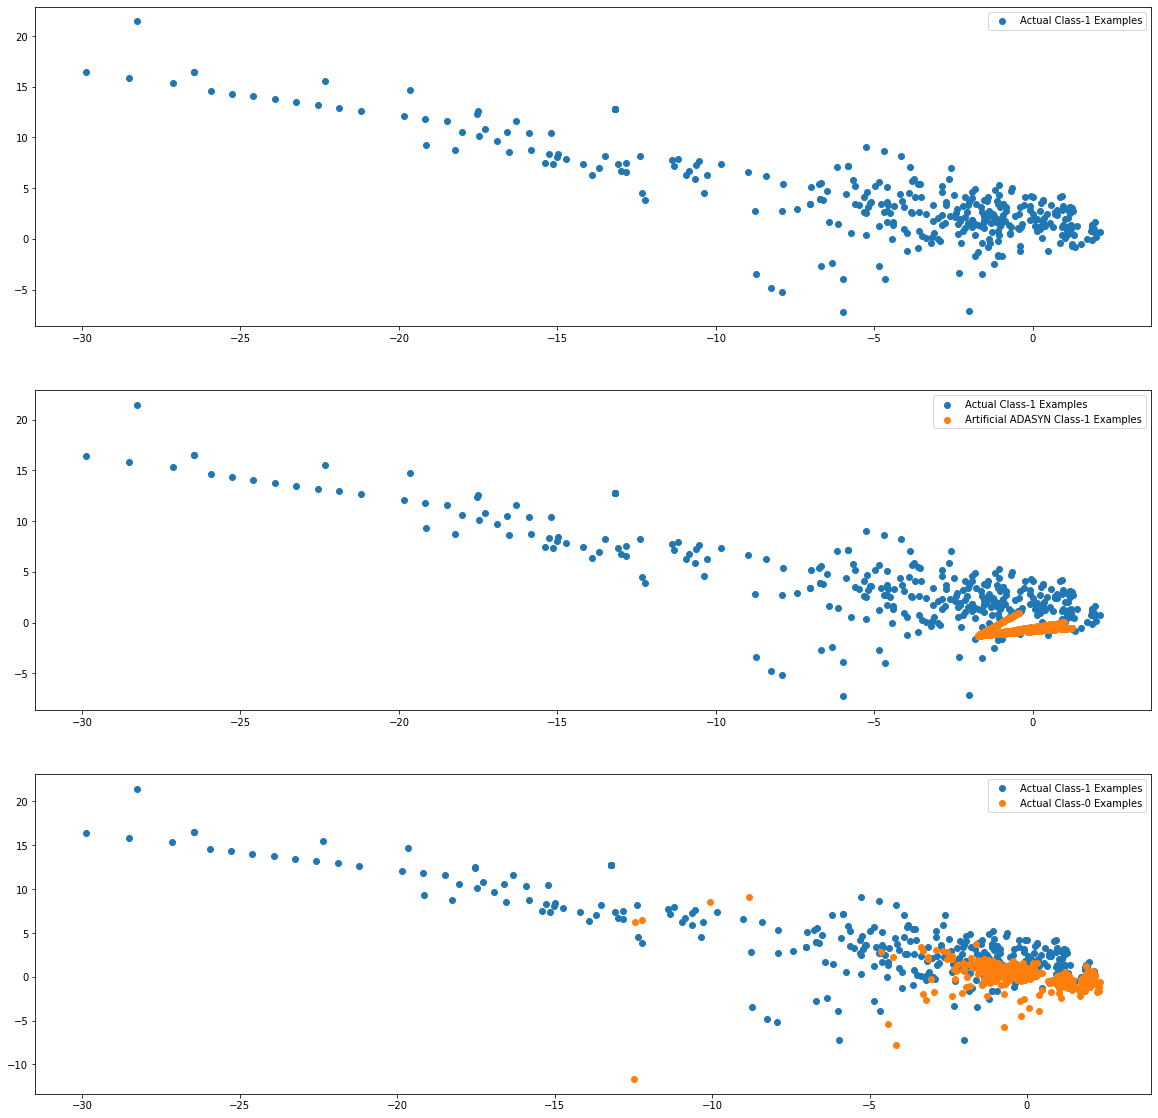

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE
grid = dict(solver=solvers,penalty= cv_num,C= num_C)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
clf = LogisticRegression()
#perform hyperparameter tuning
grid_search = GridSearchCV(estimator=clf, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
clf_adasyn = grid_search.fit(X_train_adasyn, y_train_adasyn)
#print the evaluation result by choosing a evaluation metric
y_pred_adasyn = clf_adasyn.predict(X_test)
y_pred_proba_reg_adasyn = clf_adasyn.predict_proba(X_test)[:,1]
print("F1 score is: {}".format(f1_score(y_test, y_pred_adasyn)))
print("AUC Score is: {}".format(roc_auc_score(y_test, y_pred_proba_reg_adasyn)))
#print the optimum value of hyperparameters
print("Best: %f using %s" % (clf_adasyn.best_score_, clf_adasyn.best_params_))



F1 score is: 0.03348978815171889
AUC Score is: 0.9692313268127069
Best: 0.964701 using {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


##### Build models on other algorithms to see the better performing on ADASYN

Apply Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
param_grid = {
    'max_depth': [4],
   # 'min_samples_leaf': range(1000, 4000, 2000)
   # 'min_samples_split': range(200, 500, 200),
    'n_estimators': [200,300,400, 500, 600]
    #'max_features': [5, 10,15,25]
}
# Create a based model
rf_adasyn = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf_adasyn = GridSearchCV(estimator = rf_adasyn, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,scoring='roc_auc',verbose = 100)
# Fit the grid search to the data
grid_search_rf_adasyn.fit(X_train_adasyn, y_train_adasyn)
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search_rf_adasyn.best_score_,'using',grid_search_rf_adasyn.best_params_)

Apply XGBoost:

In [ ]:
xg_adasyn = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, gamma = 0.2, n_estimators = 150,min_child_weight=3,booster='gbtree', scoring='roc_auc')


In [ ]:
xgb_params = xg_adasyn.get_xgb_params()
cv_results_xgb = xgb.cv(dtrain=data_dmatrix, params=xgb_params, nfold=5,
                    num_boost_round=xg_adasyn.get_params()['n_estimators'],early_stopping_rounds=50,metrics="auc", as_pandas=True, seed=123)
# Getting the tuned hyperparameters
xg_adasyn.set_params(n_estimators=cv_results_xgb.shape[0])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, scoring='roc_auc',
              seed=None, silent=None, subsample=1, verbosity=1)

In [41]:
#use this to train and predict
xg_adasyn_2 = xg_adasyn.fit(X_train_adasyn,y_train_adasyn,eval_metric='auc')
y_pred_xg_adasyn_2 = xg_adasyn_2.predict(X_test.values)
y_pred_xg_adasyn_proba_2 = xg_adasyn_2.predict_proba(X_test.values)[:,1]
print("F1 score is: {}".format(f1_score(y_test, y_pred_xg_adasyn_2)))
print("AUC Score is: {}".format(roc_auc_score(y_test, y_pred_xg_adasyn_proba_2)))

F1 score is: 0.34285714285714286
AUC Score is: 0.9644665922876917


### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

**The best model we observed is Random Forest with max_depth = 12 and n_estimators= 300.
The technique which suited best for the model is Random Oversampling method.**

In [51]:
# perform the best oversampling method on X_train & y_train

clf = RandomForestClassifier(max_depth= 12, n_estimators= 300) #initialise the model with optimum hyperparameters
clf.fit(X_over,y_over) # fit on the balanced dataset
print("F1 score is: {}".format(f1_score(y_test, clf.predict(X_test)))) #print the evaluation score on the X_test by choosing the best evaluation metric

F1 score is: 0.7558528428093644


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 10
3rd Top var = 12


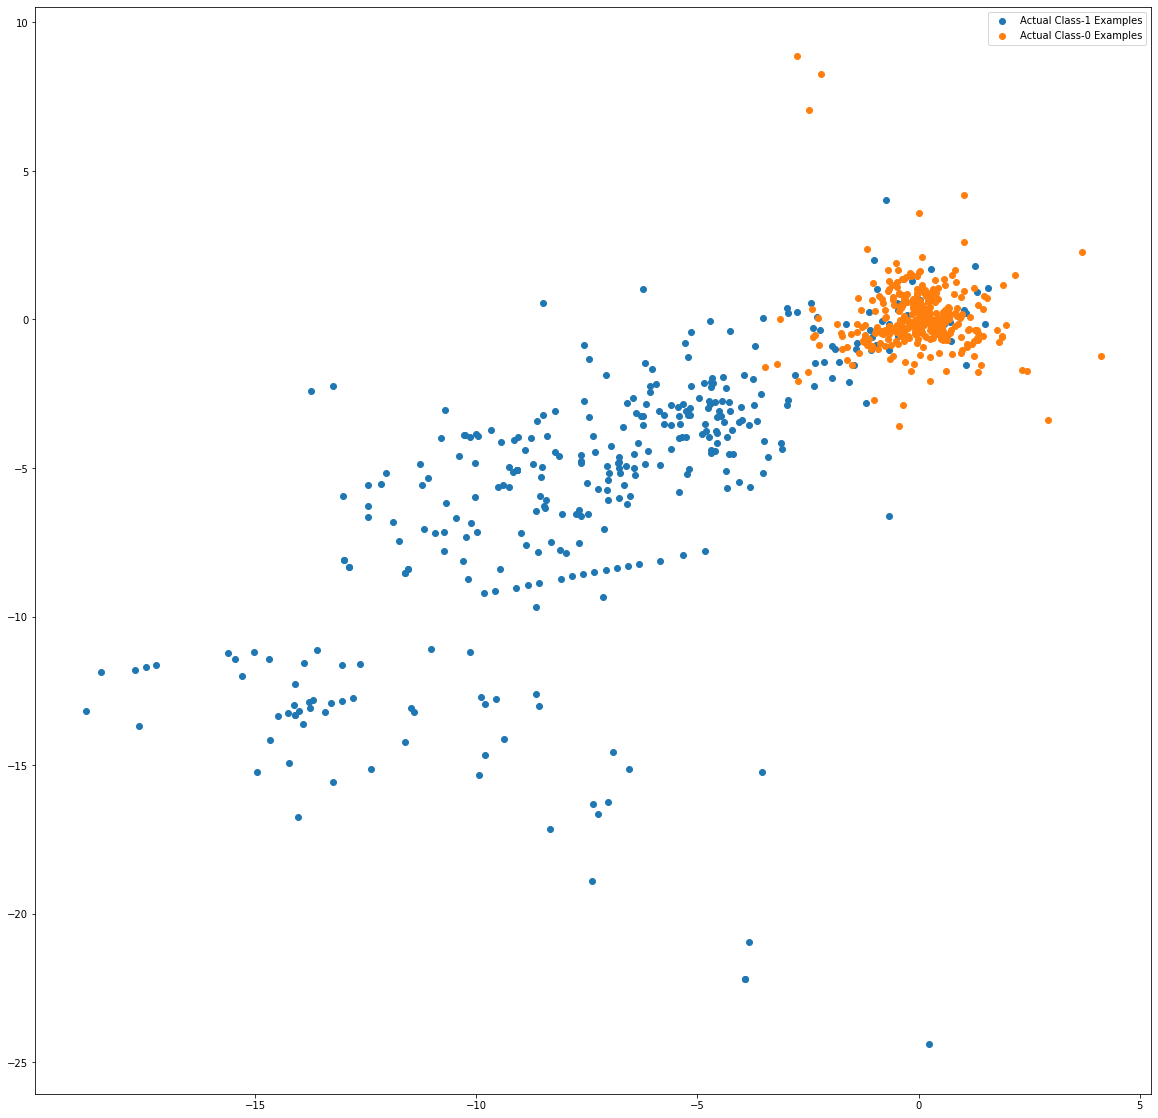

In [52]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [63]:
from sklearn.metrics import roc_auc_score
print('Train auc =', metrics.roc_auc_score(y_test,clf.predict(X_test)))

Train auc = 0.8976294137198663


In [60]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = metrics.roc_curve(y_test,clf.predict(X_test),pos_label=1)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

1
